In [36]:
import FinanceDataReader as fdr
import pandas   as pd
import pymysql
from datetime import datetime
import matplotlib.pyplot as plt

connection = pymysql.connect(host='localhost', port=3306, db='Investar', \
	user='root', passwd ='', autocommit=True)
cursor = connection.cursor()

query = "                                                                \
select a.code, b.name, a.date, a.open, a.high, a.low, a.close, a.volume  \
from  daily_price  a                                                     \
join  company_info  b                                                    \
	on  a.code = b.symbol                                                \
where  1=1                                                               \
and    date_format(a.date,'%Y%m%d') > '20210101'                         \
and    code = '009150'                                                   \
"

df = pd.read_sql(query,connection)
connection.close()




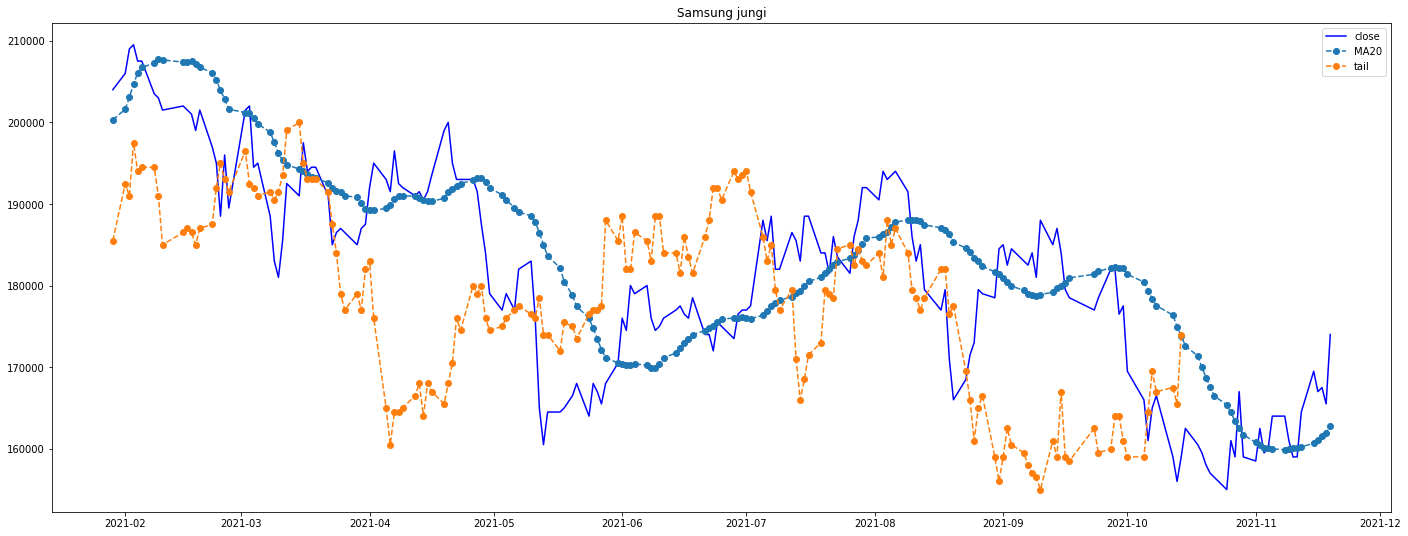

In [21]:
# 주가를 26일 앞으로 그려본다(후행스팬)
# 실제로는 주가롤 26일 앞으로 가져오지 않고 20이평선을 26일 후행시킬것이다.
df['MA20'] = df['close'].rolling(window=20).mean()
df['tailspan'] = df['close'].shift(periods=-26)
df=df[19:]
df = df.set_index('date')

plt.figure(figsize=(24,9))
plt.plot(df.index, df['close'], color = '#0000FF', label='close')
plt.plot(df.index, df['MA20'], 'o--',label = 'MA20')
plt.plot(df.index, df['tailspan'], 'o--',label = 'tail')
plt.legend(loc='best')
plt.title('Samsung jungi')
plt.show()

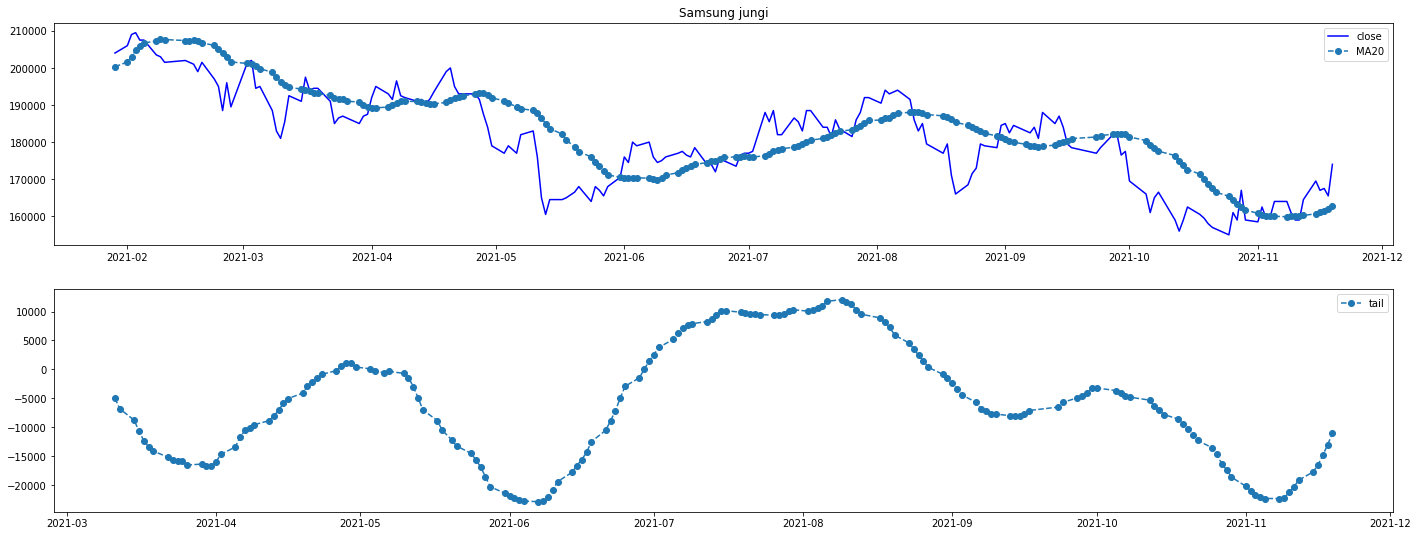

In [37]:
df['MA20'] = df['close'].rolling(window=20).mean()  
df['tailspan'] = df['MA20'].shift(periods=26)   #20이평선을 26일 이후로 옮겨온다.
df['tailbet'] = df['tailspan'] - df['close']
df=df[19:]
df = df.set_index('date')

plt.figure(figsize=(24,9))
p1 = plt.subplot(2,1,1)
plt.plot(df.index, df['close'], color = '#0000FF', label='close')
plt.plot(df.index, df['MA20'], 'o--',label = 'MA20')
plt.legend(loc='best')
plt.title('Samsung jungi')

p2 = plt.subplot(2,1,2)
plt.plot(df.index, df['tailbet'], 'o--',label = 'tail')
plt.legend(loc='best')
plt.show()